# dfdsfds

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd


from matplotlib.ticker import EngFormatter
formatter = EngFormatter(places=0, sep=u"\N{THIN SPACE}")  # U+2009


In [2]:
data = pd.read_csv("./data/muestra.csv", encoding = "iso-8859-1")
data.head()

,CO_ID,BILLCYCLE,NUMCODPLANTARIFARIO,F_ACT,F_TRAFICO,HORA,GB_TOTAL,NO_FREE,FREE,BANCOS,...,SPOTIFY_PI,APPLEM_PI,SOUNDC_PI,FACE_PI,MAIL_PI,WHATS_RO_I,WHATS_RO_IF,WAZE_RO,EMAIL_RO,WHARS_RO2
0,27782393,3.0,1981,11/11/2016,02/08/2018,Noche,0.0000,0.0000,0.0000,0.0,...,0.0,0,0.0,0,0,0.0,0.0,0.0,0,0.0
1,41901365,5.0,1982,20/01/2018,02/08/2018,Mañana,0.0411,0.0301,0.0007,0.0,...,0.0,0,0.0,0,0,0.0,0.0,0.0,0,0.0
2,31801426,5.0,1981,17/04/2017,02/08/2018,Madrugada,0.0138,0.0078,0.0014,0.0,...,0.0,0,0.0,0,0,0.0,0.0,0.0,0,0.0
3,41410806,4.0,1982,05/01/2018,02/08/2018,Madrugada,0.0799,0.0603,0.0078,0.0,...,0.0,0,0.0,0,0,0.0,0.0,0.0,0,0.0
4,42886287,5.0,1981,20/02/2018,02/08/2018,Mañana,0.2182,0.0096,0.0000,0.0,...,0.0,0,0.0,0,0,0.0,0.0,0.0,0,0.0


In [3]:
data['F_TRAFICO'] = pd.to_datetime(data['F_TRAFICO'])
data['dia_semana'] = data['F_TRAFICO'].dt.dayofweek
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['dia_semana'] = data['dia_semana'].apply(lambda x: days[x])

In [4]:
data.head()

,CO_ID,BILLCYCLE,NUMCODPLANTARIFARIO,F_ACT,F_TRAFICO,HORA,GB_TOTAL,NO_FREE,FREE,BANCOS,...,APPLEM_PI,SOUNDC_PI,FACE_PI,MAIL_PI,WHATS_RO_I,WHATS_RO_IF,WAZE_RO,EMAIL_RO,WHARS_RO2,dia_semana
0,27782393,3.0,1981,11/11/2016,2018-02-08,Noche,0.0000,0.0000,0.0000,0.0,...,0,0.0,0,0,0.0,0.0,0.0,0,0.0,Thu
1,41901365,5.0,1982,20/01/2018,2018-02-08,Mañana,0.0411,0.0301,0.0007,0.0,...,0,0.0,0,0,0.0,0.0,0.0,0,0.0,Thu
2,31801426,5.0,1981,17/04/2017,2018-02-08,Madrugada,0.0138,0.0078,0.0014,0.0,...,0,0.0,0,0,0.0,0.0,0.0,0,0.0,Thu
3,41410806,4.0,1982,05/01/2018,2018-02-08,Madrugada,0.0799,0.0603,0.0078,0.0,...,0,0.0,0,0,0.0,0.0,0.0,0,0.0,Thu
4,42886287,5.0,1981,20/02/2018,2018-02-08,Mañana,0.2182,0.0096,0.0000,0.0,...,0,0.0,0,0,0.0,0.0,0.0,0,0.0,Thu


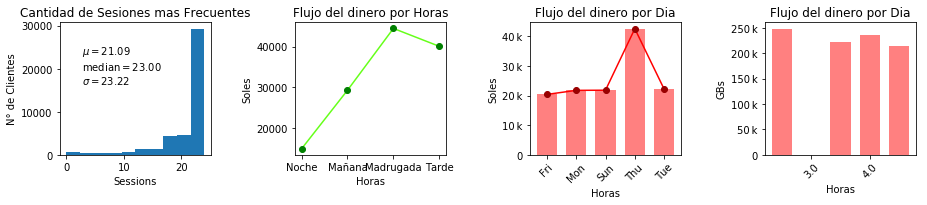

In [5]:

fig, axes = plt.subplots(1, 4, figsize=(14,2))
ax1, ax2, ax3, ax4 = axes.flatten()
plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.55, wspace=0.55)


ax1.xaxis.set_major_formatter(formatter)
#ax1.yaxis.set_major_formatter(formatter)
y = data.groupby(['CO_ID']).count()      # Us por cliente
y = y["BILLCYCLE"].tolist()
mu = np.mean(y)
median = np.median(y)
sigma = np.var(y)
text = '$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$' % (mu, median, sigma)
ax1.hist(y,10)
ax1.set_title('Cantidad de Sesiones mas Frecuentes')
ax1.set_xlabel('Sessions')
ax1.set_ylabel('N° de Clientes')
#ax1.set_xticklabels(np.unique(y))
ax1.text(0.15, 0.85, text, transform=ax1.transAxes, fontsize=10, verticalalignment='top')

ax2.xaxis.set_major_formatter(formatter)
y = data.groupby(['HORA']).sum()['GB_TOTAL']
x = y.index
y = y.values
ax2.plot(x,y,'-',color='#66ff1a')
ax2.plot(x,y,'ob',color='green')
ax2.set_xticklabels(data['HORA'].unique())
ax2.set_title('Flujo del dinero por Horas')
ax2.set_xlabel('Horas')
ax2.set_ylabel('Soles')

y = data.groupby(['dia_semana']).sum()['GB_TOTAL']
ax3.yaxis.set_major_formatter(formatter)
ax3.set_xticklabels(y.index, rotation=45)
ax3.bar(y.index,y.values,0.7,color='#ff8080')
ax3.plot(y.index,y.values,'-',color='#ff0000')
ax3.plot(y.index,y.values,'ob',color='#990000')
ax3.set_title('Flujo del dinero por Dia')
ax3.set_xlabel('Horas')
ax3.set_ylabel('Soles')

y = data.groupby(['BILLCYCLE']).count()['GB_TOTAL']
x = y.index
y = y.values
ax4.yaxis.set_major_formatter(formatter)
ax4.set_xticklabels(x, rotation=45)
ax4.bar(x,y,0.7,color='#ff8080')
ax4.set_title('Flujo del dinero por Dia')
ax4.set_xlabel('Horas')
ax4.set_ylabel('GBs')

plt.savefig("imagen.png",dpi = 1000)